**Lecturer:** Dr Shahram Azizi Sazi

**Qualifications:** BSc.,MSc., PhD. in Data and Knowlege processing, TCD. 

**Email:** shahram.azizisazi@dbs.ie

**LinkedIn**:  https://www.linkedin.com/in/shahram-azizi-6149342a/

Link for dataset:  https://github.com/shazizisazi/Datasets 


# Illustrative example:

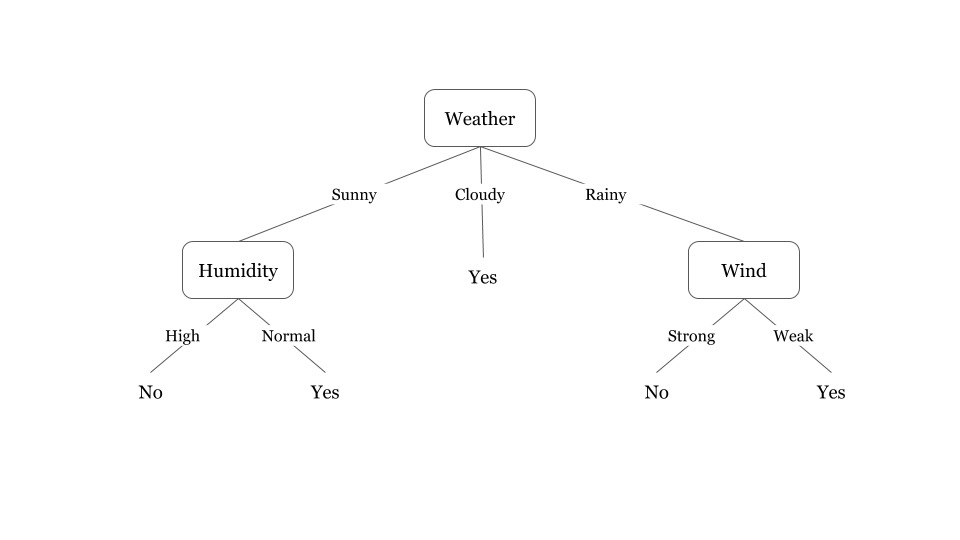

In [ ]:
import pandas as pd
dataset= pd.read_csv('/content/play_tennis1.csv')
dataset.head(6)

X=dataset[['humidity','wind']]  # matrix of input variables
y=dataset['play']  # output variable
y.unique()
 

array(['No', 'Yes'], dtype=object)

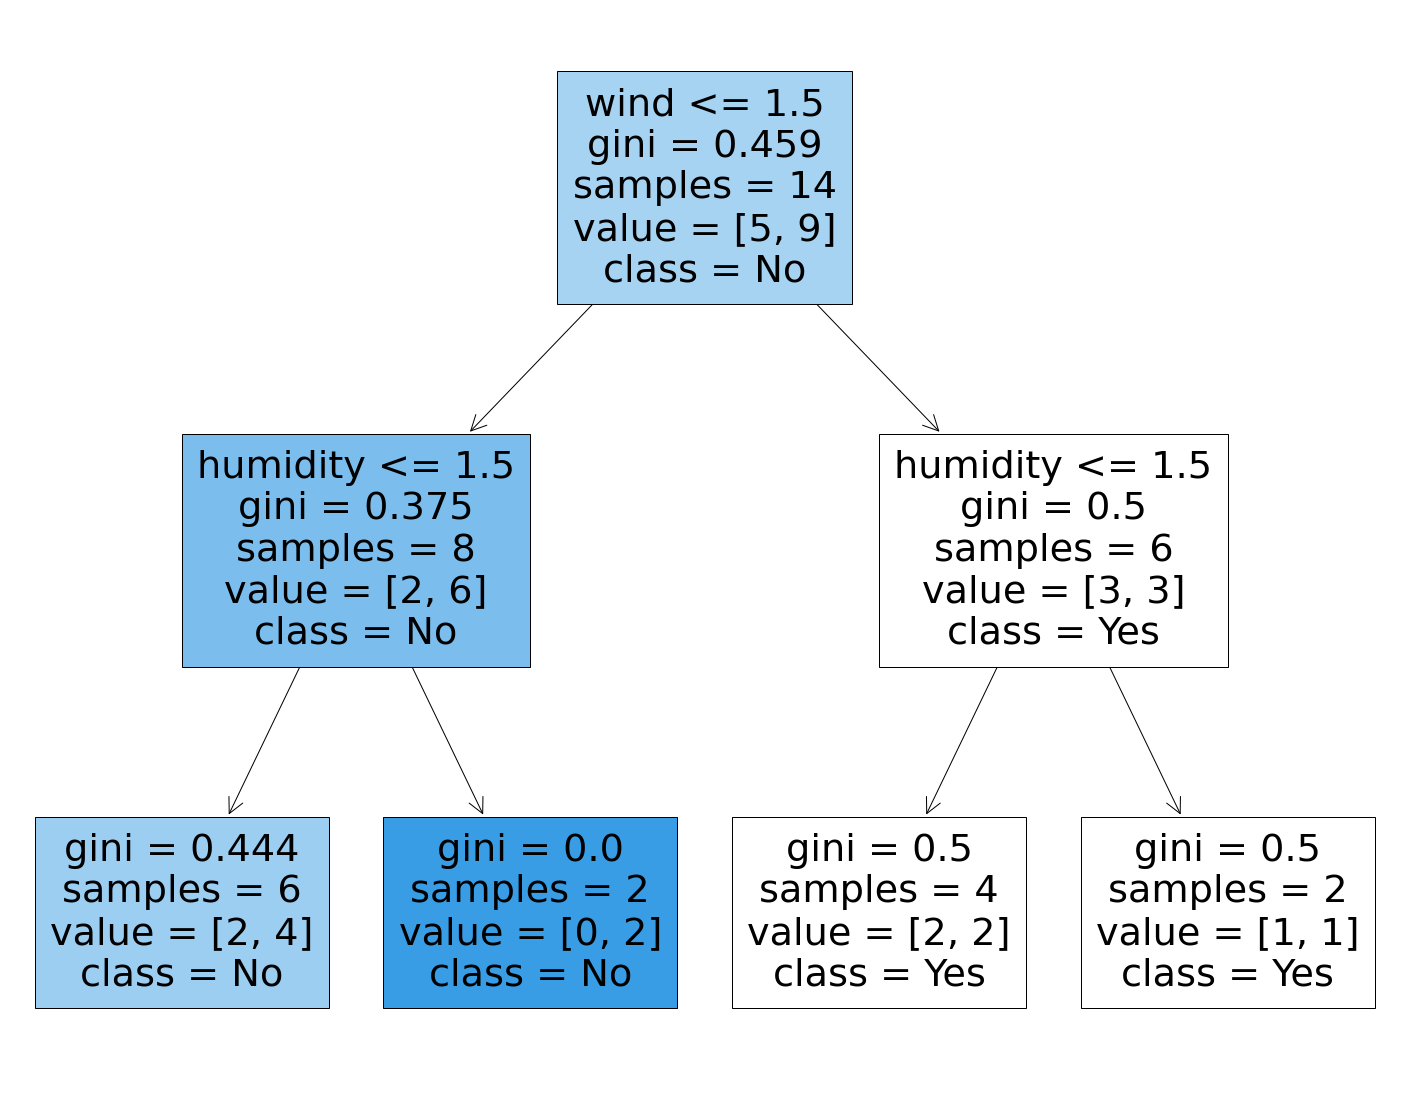

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# DOT data
clf=DecisionTreeClassifier()
model=clf.fit(X,y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns, 
                   class_names=['Yes', 'No'],
                   filled=True)

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# DOT data
clf=DecisionTreeClassifier()
model=clf.fit(X,y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=[0, 1, 2],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

TypeError: ignored

# Use Gini index to specify the root node of the decision tree for playtennis dataset. 

#Example 1: 
use decision tree algorithm with gini and entropy rules to predict the species of flowers in the Iris dataset, and compare the result versus SVC and Multinomial logistic regression in 1000 mc runs. 

In [ ]:
import pandas as pd
dataset= pd.read_csv('Iris.csv')
dataset.head(6)

X=dataset.drop('Species',axis=1)  # matrix of input variables
y=dataset['Species']  # output variable
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
import pandas as pd
dataset= pd.read_csv('Iris.csv')
dataset.head(6)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


1. input variables: SepalLengthCm,	SepalWidthCm	PetalLengthCm,	PetalWidthCm

2. output variable:  Species

In [ ]:
X=dataset.drop('Species',axis=1)  # matrix of input variables
y=dataset['Species']  # output variable
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report, recall_score
from sklearn.tree import DecisionTreeClassifier # decision tee algorithm for classification
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
dt=DecisionTreeClassifier()


DecisionTreeClassifier()

In [ ]:
classification_report(y_test,YPred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00         9\nIris-versicolor       1.00      1.00      1.00        10\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

In [ ]:
model=DecisionTreeClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)# split dataset
m = model.fit(X_train,y_train) # fit the model
YPred = m.predict(X_test) # predict
re = recall_score(y_test,YPred,average='weighted') # compute re
re


0.9666666666666667

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict()
  models['dt_ent'] = DecisionTreeClassifier(criterion='entropy')
  models['dt_gini'] = DecisionTreeClassifier(criterion='gini')
  models['mlr']=LogisticRegression()
  models['lsvc']=SVC(kernel='linear')
  models['rsvc']=SVC()
  models['ssvc']=SVC(kernel='sigmoid')
  models['psvc']=SVC(kernel='poly')
  
  return models



In [ ]:
models=get_models()
models.items()

dict_items([('dt_ent', DecisionTreeClassifier(criterion='entropy')), ('dt_gini', DecisionTreeClassifier()), ('mlr', LogisticRegression()), ('lsvc', SVC(kernel='linear')), ('rsvc', SVC()), ('ssvc', SVC(kernel='sigmoid')), ('psvc', SVC(kernel='poly'))])

In [ ]:
# evaluate based on Mc runs a give model
    
import numpy as np
def evaluate_model(model, X, y,m,s):
  acc = [] ### Blank vector
  for i in range(m):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=s)# split dataset
    m = model.fit(X_train,y_train) # fit the model
    YPred = m.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
    return np.mean(acc)

In [ ]:
from numpy import mean, std
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y, 100,0.2)
	results.append(scores)
	names.append(name)
	print(  (name, mean(scores)))
# plot model performance for comparison

('dt_ent', 0.9)
('dt_gini', 0.9666666666666667)
('mlr', 0.9666666666666667)
('lsvc', 1.0)
('rsvc', 1.0)
('ssvc', 0.2)
('psvc', 0.9333333333333333)


# Evaluate the models in dictionary using k-fold cross validation


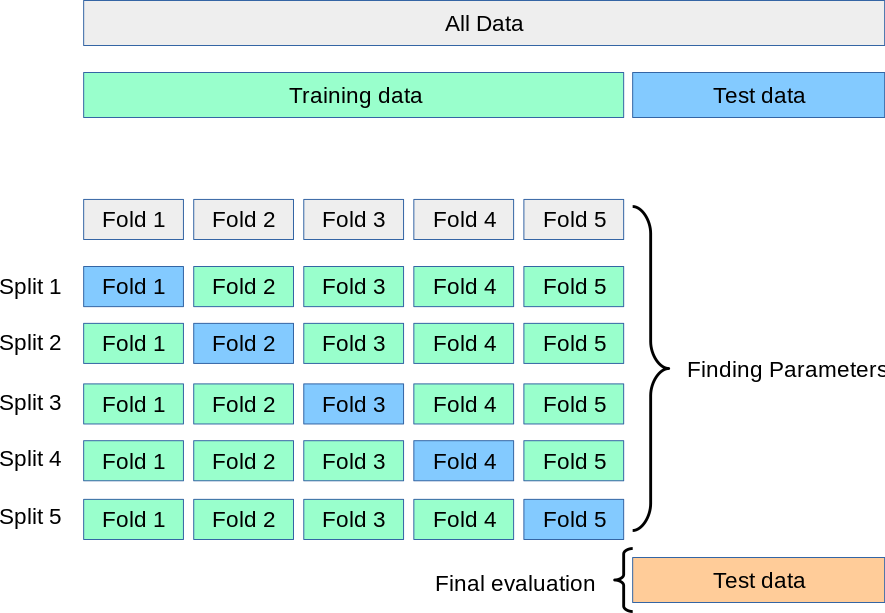

In [ ]:
# evaluate based on Mc runs a give model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score    
import numpy as np
def cross_evaluator(model, X, y,k):
  scores = cross_val_score(model, X, y, cv=k)
  return np.mean(scores)

In [ ]:
from numpy import mean, std
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
print('------the following result is the accuracy of different model in the dictionary of SML based on 5-fold cross validation-----')
for name, model in models.items():
  scores = cross_evaluator(model, X, y,5)
  results.append(scores)
  names.append(name)
  

  print(  (name, mean(scores)))
# plot model performance for comparison

------the following result is the accuracy of different model in the dictionary of SML based on 5-fold cross validation-----
('dt_ent', 0.9533333333333334)
('dt_gini', 0.9666666666666668)
('mlr', 0.9733333333333334)
('lsvc', 0.9800000000000001)
('rsvc', 0.9666666666666666)
('ssvc', 0.06666666666666667)
('psvc', 0.9800000000000001)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from numpy import mean, std
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y, 100,0.2)
	results.append(scores)
	names.append(name)
	print(  (name, mean(scores)))
# plot model performance for comparison


('dt_ent', 0.9666666666666667)
('dt_gini', 0.9666666666666667)
('mlr', 0.9666666666666667)
('lsvc', 1.0)
('rsvc', 0.9333333333333333)
('ssvc', 0.23333333333333334)
('psvc', 0.9666666666666667)


# Conclusion:
 based on above result, the best model among all is linear svc due to having the highest value of accuracy. 

# Working example for classification:

a) create a dictionary of models using svc, logistic regression, GuassianNB and Decision tree with Entropy kernel. 

b) evaluate the dictionary of models using recall and validate the result in 5-fold cross validation. 

c) deploy the best model to classify the last sample in the original dataset



In [ ]:
from pandas import read_csv
data=read_csv('/content/Default_Loan.csv')
data.head()
data['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score   
from sklearn.model_selection import train_test_split  
import numpy as np
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
# data preprocesser
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1) # testset is 10%
def data_prep(X_train,X_test,y_train):
  
  # fit and apply the transform
  X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
  scalar=MinMaxScaler()
  N=scalar.fit_transform(X_train_under)
  X_strain=DataFrame(N)
  header=X_train.columns # header from the original dataset
  X_strain.columns=header
  #############################
  N=scalar.fit_transform(X_test)
  X_stest=DataFrame(N)
  header=X.columns # header from the original dataset
  X_stest.columns=header
  #undersampler
  
  return X_strain, X_stest, y_train_under

In [ ]:
from sklearn.naive_bayes import GaussianNB 

In [ ]:
# data modeller 
from sklearn.naive_bayes import GaussianNB 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['dt_ent'] = DecisionTreeClassifier(criterion='entropy')
  models['mlr']=LogisticRegression()
  models['lsvc']=SVC(kernel='linear')
  models['rsvc']=SVC()
  models['ssvc']=SVC(kernel='sigmoid')
  models['psvc']=SVC(kernel='poly')
  models['gnb']=GaussianNB()
  
  return models



In [ ]:
# evaluate based on Mc runs a give model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score    
import numpy as np
def cross_evaluator(model, X, y,k):
  scores = cross_val_score(model, X, y, cv=k)
  return np.mean(scores)

In [ ]:

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # testset is 30%


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn.tree import DecisionTreeClassifier # decision tee algorithm for classification
DecisionTreeClassifier() # description for each hyperparameter:  https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
 

DecisionTreeClassifier()

In [ ]:
model_dt=DecisionTreeClassifier() # create the model
dt = model_dt.fit(X_train,y_train)  # fit the model to trainset
YPred = dt.predict(X_test)   # predict the output variable in the testset

accuracy = accuracy_score(y_test,YPred)
report = classification_report(YPred, y_test)
cm = confusion_matrix(y_test, YPred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.9111111111111111
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      0.83      0.88        18
 Iris-virginica       0.75      0.90      0.82        10

       accuracy                           0.91        45
      macro avg       0.90      0.91      0.90        45
   weighted avg       0.92      0.91      0.91        45

Confusion matrix:
[[17  0  0]
 [ 0 15  1]
 [ 0  3  9]]


#Evaluate the accuracy of decision tree classifier in 1000 MC runs


In [ ]:
 import numpy as np
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result


Accuracy using 1000 MC run: 0.9458000000000002


#Create one-sigma intervale estimation for accuracy


In [ ]:
xbar=np.mean(acc)
s=np.std(acc)
L=xbar-s
U=xbar+s
print('one-sigma interval estimation:',L,min(U,1))

one-sigma interval estimation: 0.9136708658668184 0.9768180230220707


# Example 2:

Use a set of classifiers to **diagnosis** the cancer in **cancerdata** based on 20% testset. which model is outperforming?



In [ ]:
import pandas as pd
dataset= pd.read_csv('/content/cancerdata.csv')
dataset.head(6)
X=dataset.drop(['id','diagnosis'],axis=1)  # matrix of input variables
y=dataset['diagnosis']  # output variable
y.unique()
y.value_counts()


B    183
M    157
Name: diagnosis, dtype: int64

In [ ]:
#data preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from pandas import DataFrame
 
scalar=MinMaxScaler()
X_scaled=scalar.fit_transform(X)
X_scaled=DataFrame(X_scaled)
header=X.columns # header from the original dataset

X_scaled.columns=header
X_scaled.head() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.364042,0.680010,0.792037,0.703140,0.731113,0.668446,0.605518,...,0.692735,0.141525,0.787546,0.564802,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.502017,0.270471,0.181768,0.203608,0.348757,0.344367,0.141323,...,0.677253,0.303571,0.636129,0.545399,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449798,0.572941,0.431017,0.462512,0.635686,0.481580,0.211247,...,0.620881,0.360075,0.599155,0.469324,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102993,0.973233,0.811361,0.565604,0.522863,0.763481,1.000000,...,0.277094,0.385928,0.284406,0.117808,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489705,0.459788,0.347893,0.463918,0.518390,0.342766,0.186816,...,0.579992,0.123934,0.597394,0.428052,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
# data modelling (dictionary), evaluation (accuracy) and validation (Monte carlo technique) : apply the dictionary of models on the prepared dataset and specify the best model 
from numpy import mean, std
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_scaled, y, 1000,0.2)
	results.append(scores)
	names.append(name)
	print(  (name, mean(scores)))
# plot model performance for comparison



('dt_ent', 0.9264705882352942)
('dt_gini', 0.8970588235294118)
('mlr', 0.9411764705882353)
('lsvc', 0.9852941176470589)
('rsvc', 0.9705882352941176)
('ssvc', 0.19117647058823528)
('psvc', 0.9411764705882353)


In [ ]:
# deployment phase: apply the best model to make a prediction
X_new= [[18.63,25.11,124.8,1088,0.1064,0.1887,0.2319,0.1244,0.2183,0.06197,0.8307,1.466,5.574,105,0.006248,0.03374,0.05196,0.01158,0.02007,0.00456,23.15,34.01,160.5,1670,0.1491,0.4257,0.6133,0.1848,0.3444,0.09782]]
#prepare

X_new_scaled=scalar.fit_transform(X_new)
X_new_scaled=DataFrame(X_new_scaled)
header=X.columns # header from the original dataset

X_new_scaled.columns=header


best=SVC(kernel='linear')
m=best.fit(X_scaled,y)
m.predict(X_new_scaled)




array(['B'], dtype=object)

Apply the best model for different ratio of testset i.e (0.2,0.3,0.4,0.5,0.6,0.7), and visualize the accuracy of the model.

In [ ]:
import numpy as np

tsize = [0.2,0.3,0.4,0.5,0.6,0.7]
tsize_acc = {}
for i in tsize:
    acc = []
    for j in range(100):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i, random_state = j)
        best=SVC(kernel='linear')
        best.fit(X_train, y_train)
        best_pred = best.predict(X_test)
        accuracy = accuracy_score(y_test,best_pred)
        acc.append(accuracy)
    tsize_acc.update({i:np.mean(acc)})
print(tsize_acc)

{0.2: 0.9544117647058823, 0.3: 0.9515686274509803, 0.4: 0.9503676470588236, 0.5: 0.9468823529411766, 0.6: 0.9419607843137255, 0.7: 0.9347899159663866}


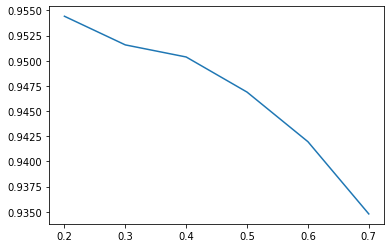

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(*zip(*sorted(tsize_acc.items())))
plt.show()

#Apply decision tree for different ratio of testset i.e (0.2,0.3,0.4,0.5,0.6,0.7), and visualize the accuracy of the model.

In [ ]:
import numpy as np

tsize = [0.2,0.3,0.4,0.5,0.6,0.7]
tsize_acc = {}
for i in tsize:
    acc = []
    for j in range(1000):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i, random_state = j)
        dt = DecisionTreeClassifier()
        dt.fit(X_train, y_train)
        dt_pred = dt.predict(X_test)
        accuracy = accuracy_score(y_test,dt_pred)
        acc.append(accuracy)
    tsize_acc.update({i:np.mean(acc)})
print(tsize_acc)



{0.2: 0.9468666666666667, 0.3: 0.9452666666666667, 0.4: 0.9452166666666666, 0.5: 0.9440666666666666, 0.6: 0.942677777777778, 0.7: 0.9394761904761906}


In [ ]:
import matplotlib as plt

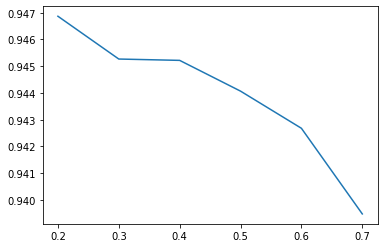

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(*zip(*sorted(tsize_acc.items())))
plt.show()

# design a recommendation system based on decision tree classifier and test it using the first row of the dataset. 

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X, y)
dt.predict(X.iloc[1:2,:]) #Predict on 1st Row of X


array(['Iris-setosa'], dtype=object)

Compute the predicted value for this input: x= [1,3,2.1, 0.5] 

In [ ]:
import numpy as np
x=np.array([1,3,2.1, 0.5])
dt.predict(x.reshape(1,-1))
 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Iris-setosa'], dtype=object)

In [ ]:
x1=input('SepalLengthCm:')  #SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm
x2=input('SepalWidthCm:')
x3=input('PetalLengthCm:')
x4=input('PetalWidthCm:')
x=np.array([x1,x2,x3,x4])
y=dt.predict(x.reshape(1,-1))
print('type of folower:',y)

SepalLengthCm:2
SepalWidthCm:1
PetalLengthCm:5.3
PetalWidthCm:1
type of folower: ['Iris-virginica']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


#Plot the decision tree

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
X.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


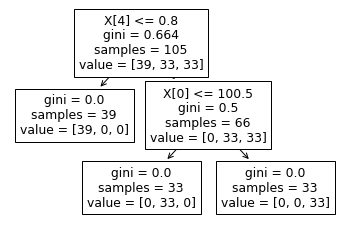

In [ ]:
tree.plot_tree(dt);

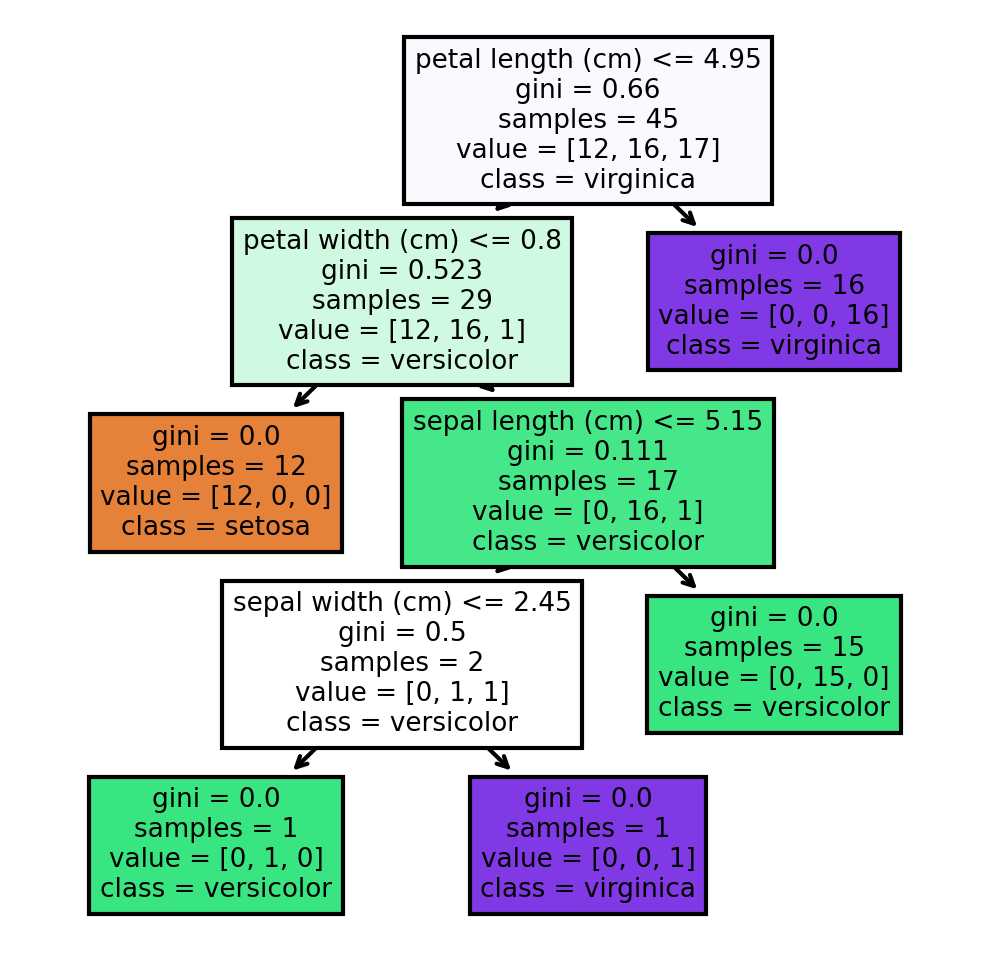

In [ ]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')


 Fraud detection analytics 

In [ ]:
from google.colab import files
uploaded = files.upload()
 


Saving mtcars.csv to mtcars.csv


#Example:

apply dt on **mtcars** dataset to predict **vs**, plot the tree. 

In [ ]:
dataset= pd.read_csv('mtcars.csv')
dataset.head(6)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
X=dataset.drop('vs',axis=1)
y=dataset['vs']
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=2) # testset is 30%


In [ ]:
model_dt=DecisionTreeClassifier()
dt = model_dt.fit(X_train,y_train)
YPred = dt.predict(X_test)

accuracy = accuracy_score(y_test,YPred)
 
print("Accuracy: ", accuracy)
 

Accuracy:  1.0


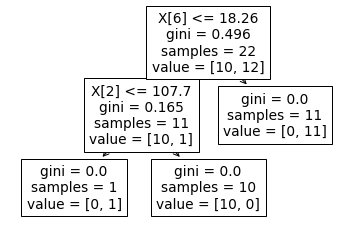

In [ ]:
tree.plot_tree(dt);

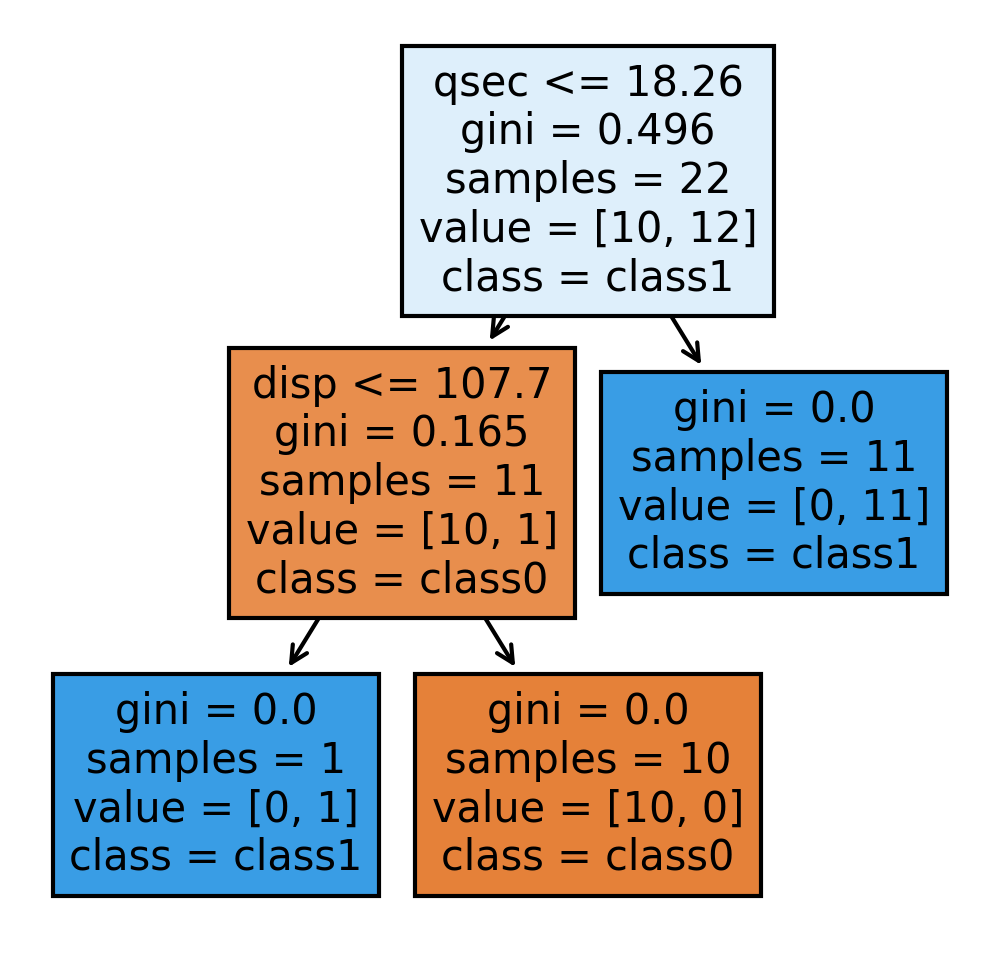

In [ ]:
fn=['mpg',	'cyl',	'disp',	'hp',	'drat',	'wt',	'qsec',	'am',	'gear',	'carb']
cn=['class0' ,'class1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,feature_names = fn,  class_names=cn, filled = True)
fig.savefig('imagename.png')

#Example:
 Use **boston** dataset to accomplish the regression task. to do so, consider **medv** as the output variable, apply decision tree and evaluate the model in 1000 mc runs, compute the rmse. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
dataset= pd.read_csv('boston_house_prices.csv')
dataset.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']  # continuous, regression task
 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor() # create a regression model using decision tree
regressor.fit(X_train, y_train) # fit the dtregression model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
329,22.6,22.2
371,50.0,20.2
219,23.0,18.5
403,8.3,9.6
78,21.2,21.2
...,...,...
56,24.7,22.9
455,14.1,12.7
60,18.7,19.7
213,28.1,25.0


In [ ]:
from sklearn import metrics
from math import sqrt
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  # rmse

Mean Absolute Error: 3.6676470588235297
Mean Squared Error: 34.574215686274506
Root Mean Squared Error: 5.879984327043271


In [ ]:
 import numpy as np
 from sklearn import metrics
RMSE = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeRegressor() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  y_pred = dt.predict(X_test) # predict
  rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # compute rmse
  RMSE.append(rmse) # append rmse
print("RMSE using 1000 MC run:", np.mean(RMSE))  # average of rmse to stablize the result


RMSE using 1000 MC run: 4.710993312555791


# one-sigma interval estimation for rmse


In [ ]:
from numpy import mean,std

xbar=mean(RMSE)
s=std(RMSE)
L=xbar-s
U=xbar+s
print(L,U)


3.9851623737813133 5.4336189294417006


#Evaluate the performance of dtregression for different ratio of testset i.e. (0.2,0.4,0.6,0.8) and compute the rmse, visualize the performance. 

In [ ]:
tsize=[0.2,0.4,0.6,0.8]
R={}
for j in tsize:
    RMSE = [] ### Blank vector
    for i in range(1000):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=j)# split dataset
        model_dt=DecisionTreeRegressor() # model
        dt = model_dt.fit(X_train,y_train) # fit the model
        y_pred = dt.predict(X_test) # predict
        rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # compute rmse
        RMSE.append(rmse) # append rmse
     
    R.update({j:np.mean(RMSE)})
print(R)

{0.2: 4.628778676148953, 0.4: 4.775366066957477, 0.6: 5.14509501988895, 0.8: 5.6981634355865785}


#Example 2: use mtcars dataset to predict **gear**  using decision tree models (entropy and gini index). For simplicity consider [disp, hp, drat, wt].  

In [ ]:
from pandas import read_csv
data=read_csv('/content/mtcars.csv')
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
X=data[['disp', 'hp', 'drat', 'wt']]
X.head()
y=data['gear']

In [ ]:
import numpy as np
acc_gini = [] ###  Gini technique
acc_ent = [] ###  Entropy technique
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)# split dataset
  model_gini=DecisionTreeClassifier(criterion='gini') # model
  dt_gini = model_gini.fit(X_train,y_train) # fit the model
  YPred_gini = dt_gini.predict(X_test) # predict
  a_gini = accuracy_score(y_test,YPred_gini) # compute accuracy
  acc_gini.append(a_gini) # append accuracy
  # Entropy
  model_gini=DecisionTreeClassifier(criterion='entropy') # model
  dt_ent = model_gini.fit(X_train,y_train) # fit the model
  YPred_ent = dt_ent.predict(X_test) # predict
  a_ent = accuracy_score(y_test,YPred_ent) # compute accuracy
  acc_ent.append(a_ent) # append accuracy
print("Accuracy using 1000 MC run for Gini:", np.mean(acc_gini))  # average of accuracy to stablize the result
print("Accuracy using 1000 MC run for entropy:", np.mean(acc_ent))  # average of accuracy to stablize the result

Accuracy using 1000 MC run for Gini: 0.7228571428571428
Accuracy using 1000 MC run for entropy: 0.7177142857142856


#Tutorials
1.  Example 1: Regression analysis using Machine learning algorithms
2.  Example 2: Classification  using Machine learning algorithms

 

#Example 1 (regression analysis using decision tree)
Choose a dataset_GLM, specify Eglish, reading, writing as input variables and math score is the output variable, 
* Apply decision tree regression to predict Math score based on the best tree for the last sample in the dataset. (specify the optimal value of test_size)

   
* redo the part one using SVR and Linear regression and specify the best model

*  propose a recommendation system for regression task based on the best model. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from math import sqrt 
from sklearn.metrics import mean_squared_error

In [ ]:
from pandas import read_csv, DataFrame
import numpy as np
data=read_csv('/content/dataset_GLM.csv')
data.head()
df=data[['English',	'Reading',	'Math',	'Writing']]
df.iloc[1:10]
 

,English,Reading,Math,Writing
1,84.18,87.59,61.3,82.64
2,81,70.87,48.06,88.89
3,85.45,82.44,46.14,76.75
4,81.74,83.16,46.25,84.22
5,83.14,83.74,53.37,81.09
6,85.03,81.98,72.9,85.7
7,80.84,82.97,,83.36
8,86.13,84.98,59.08,81.71
9,83.34,75.52,67,78.89


In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head(10)
df.iloc[0:10]

,English,Reading,Math,Writing
0,86.23,89.19,61.2,88.91
1,84.18,87.59,61.3,82.64
2,81,70.87,48.06,88.89
3,85.45,82.44,46.14,76.75
4,81.74,83.16,46.25,84.22
5,83.14,83.74,53.37,81.09
6,85.03,81.98,72.9,85.7
7,80.84,82.97,NaN,83.36
8,86.13,84.98,59.08,81.71
9,83.34,75.52,67,78.89


In [ ]:
 
 
df.dropna( inplace=True) 
df.iloc[1:10]

,English,Reading,Math,Writing
1,84.18,87.59,61.3,82.64
2,81,70.87,48.06,88.89
3,85.45,82.44,46.14,76.75
4,81.74,83.16,46.25,84.22
5,83.14,83.74,53.37,81.09
6,85.03,81.98,72.9,85.7
8,86.13,84.98,59.08,81.71
9,83.34,75.52,67,78.89
10,87.76,80.41,46.68,83.13


In [ ]:
import pandas as pd
X=df.drop('Math',axis=1)
y=df['Math']
 

In [ ]:
# find the best test_size value
import numpy as np

tsize = [0.2,0.3,0.4,0.5,0.6,0.7]
tsize_rmse = {}
for i in tsize:
    RMSE = []
    for j in range(10):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i, random_state = j)
        dt= DecisionTreeRegressor()
        
        dt.fit(X_train, y_train)
        dt_pred = dt.predict(X_test)
        rmse = sqrt(mean_squared_error(y_test,dt_pred))
        RMSE.append(rmse)
    tsize_rmse.update({i:np.mean(RMSE)})
print(tsize_rmse)

{0.2: 10.653785933554618, 0.3: 10.881074639046842, 0.4: 10.611785491023587, 0.5: 10.692272175765813, 0.6: 10.47642064565856, 0.7: 10.672104378540432}


#Example 2:
Choose a dataset, specify input and output variables, 
* Apply three regression models to predict the output variable. to do so, split the dataset into 70% as the trainset and 30% as the testset
* Learn the model using trainset and predict the output variable of the testset. 
* Evaluate the models using an appropriate metric and specify the best model.

*  design a recommender system for the target variable based on the best model
* elaborate on the adv and disadv of the best model. 

(linear regression, support vector regression with different kernel, decision tree regression)